In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [3]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [4]:
df.columns = ['Month', "Milk in Pounds per cow"]

In [5]:
df.head()

,Month,Milk in Pounds per cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [6]:
df.tail()

,Month,Milk in Pounds per cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [7]:
df.drop(168,axis=0, inplace=True)

In [8]:
df['Month'] = pd.to_datetime(df['Month'])

In [9]:
df.set_index('Month', inplace=True)

In [10]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


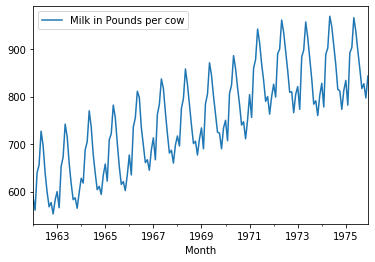

In [13]:
df.plot()

In [14]:
time_series = df['Milk in Pounds per cow']

In [15]:
type(time_series)

pandas.core.series.Series

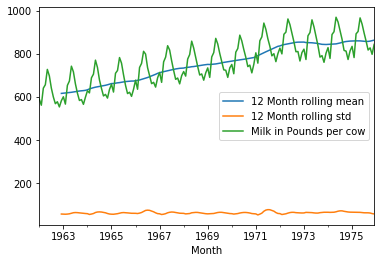

In [19]:
time_series.rolling(12).mean().plot(label='12 Month rolling mean')
time_series.rolling(12).std().plot(label='12 Month rolling std')
time_series.plot()

plt.legend()

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
decomp = seasonal_decompose(time_series)

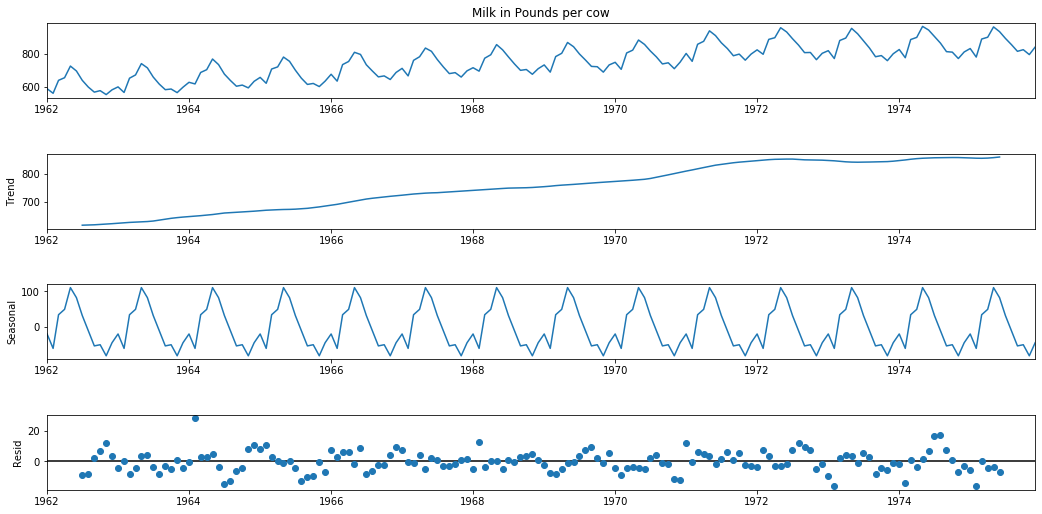

In [24]:
fig = decomp.plot()
fig.set_size_inches(16,8)